<a href="https://colab.research.google.com/github/sripriyakonjarla/Machine_Learning/blob/main/lab_session_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving training_mathbert.xlsx to training_mathbert.xlsx


Mean of incorrect class: 2.58226
Mean of correct class: 4.48965
Interclass distance: 1.90738
Spread of incorrect class: 0.90851
Spread of correct class: 0.35891


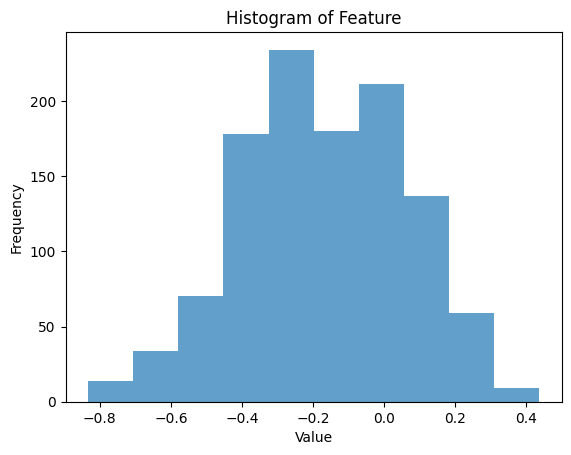

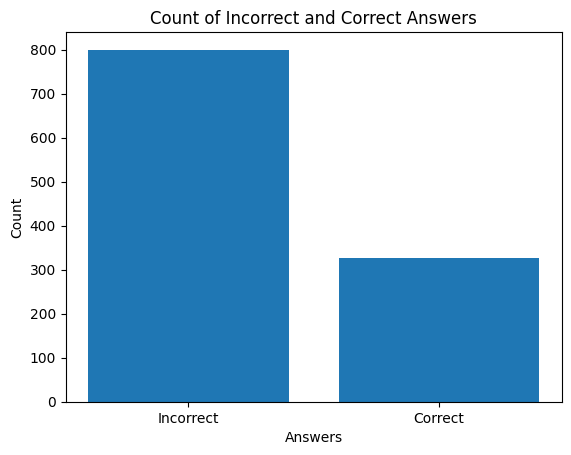

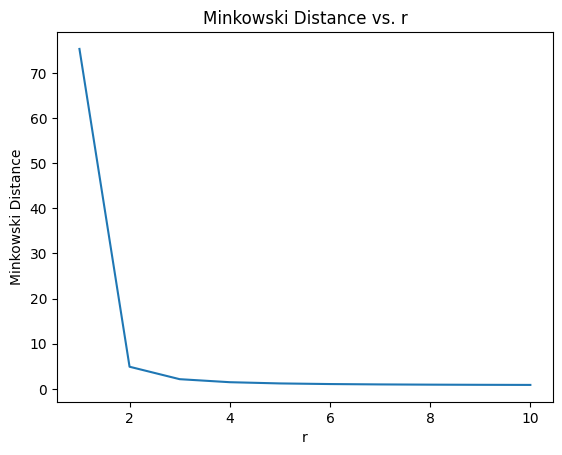

Accuracy on test set for k=3 is: 0.7522123893805309
Accuracy on test set for k=1 is: 0.7345132743362832


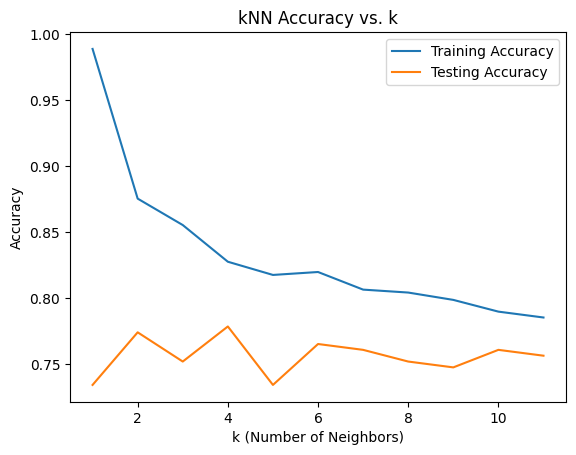

Performance on Training Data:
Confusion Matrix:
 [[563  69]
 [124 144]]
Accuracy: 0.7855555555555556
Precision: 0.676056338028169
Recall: 0.5373134328358209
F1-Score: 0.5987525987525988
False Positives: 69
False Negatives: 124

Performance on Testing Data:
Confusion Matrix:
 [[146  22]
 [ 33  25]]
Accuracy: 0.7566371681415929
Precision: 0.5319148936170213
Recall: 0.43103448275862066
F1-Score: 0.4761904761904762
False Positives: 22
False Negatives: 33


Model seems to be regular fitting.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Load data from an Excel file
def load_data(file_path):
    data = pd.read_excel(file_path)
    return pd.DataFrame(data)

# Calculate the mean of 'output' column for a specific class value
def calc_mean_class(df, column_name, class_value):
    output_values = df[df[column_name] == class_value]['output']
    return np.mean(output_values)

# Calculate the spread (standard deviation) of 'output' column for a specific class value
def calc_spread_class(df, column_name, class_value):
    output_values = df[df[column_name] == class_value]['output']
    return np.std(output_values)

# Plot histogram of a specific feature
def plot_feature_histogram(df, feature_name):
    feature_data = df[feature_name]
    plt.hist(feature_data, bins=10, alpha=0.7)
    plt.title('Histogram of Feature')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# Plot bar graph of class distribution
def plot_class_distribution(df, class_column):
    counts = df[class_column].value_counts()
    plt.bar(counts.index, counts.values)
    plt.xlabel('Answers')
    plt.ylabel('Count')
    plt.title('Count of Incorrect and Correct Answers')
    plt.xticks(counts.index, ['Incorrect', 'Correct'])
    plt.show()

# Plot Minkowski distance vs. r
def plot_minkowski_distance(df):
    vector1 = np.array(df.loc[0, 'embed_0':'embed_383'])
    vector2 = np.array(df.loc[1, 'embed_0':'embed_383'])
    r_values = range(1, 11)
    minkowski_distances = [np.power(np.sum(np.power(np.abs(vector1 - vector2), r)), 1/r) for r in r_values]

    plt.plot(r_values, minkowski_distances)
    plt.xlabel('r')
    plt.ylabel('Minkowski Distance')
    plt.title('Minkowski Distance vs. r')
    plt.show()

# Perform k-Nearest Neighbors Classification
def perform_knn_classification(df, k_values):
    X = df.loc[:, 'embed_0':'embed_383'].values
    y = df['class(0/1)'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    train_accuracies = []
    test_accuracies = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        y_train_pred = knn.predict(X_train)
        y_test_pred = knn.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        if k == 3:
            accuracy_k3 = test_accuracy
        elif k == 1:
            accuracy_k1 = test_accuracy

    return train_accuracies, test_accuracies, accuracy_k3, accuracy_k1, y_train, y_train_pred, y_test, y_test_pred

# Plot kNN accuracy vs. number of neighbors
def plot_knn_accuracy(k_values, train_accuracies, test_accuracies):
    plt.plot(k_values, train_accuracies, label='Training Accuracy')
    plt.plot(k_values, test_accuracies, label='Testing Accuracy')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy')
    plt.title('kNN Accuracy vs. k')
    plt.legend()
    plt.show()

# Print performance metrics
def print_performance_metrics(y_true, y_pred, data_type='Testing'):
    print(f"Performance on {data_type} Data:")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print("False Positives:", fp)
    print("False Negatives:", fn)
    print()

# Main program
if __name__ == "__main__":
    file_path = 'training_mathbert.xlsx'

    df = load_data(file_path)

    class_column = 'class(0/1)'
    mean_incorrect = calc_mean_class(df, class_column, 0)
    mean_correct = calc_mean_class(df, class_column, 1)
    print("Mean of incorrect class:", round(mean_incorrect, 5))
    print("Mean of correct class:", round(mean_correct, 5))
    interclass_distance = np.linalg.norm(mean_incorrect - mean_correct)
    print("Interclass distance:", round(interclass_distance, 5))

    spread_incorrect = calc_spread_class(df, class_column, 0)
    spread_correct = calc_spread_class(df, class_column, 1)
    print("Spread of incorrect class:", round(spread_incorrect, 5))
    print("Spread of correct class:", round(spread_correct, 5))

    feature_name = df.columns[0]  # Assuming the feature to be plotted is the first column
    plot_feature_histogram(df, feature_name)

    plot_class_distribution(df, class_column)

    plot_minkowski_distance(df)

    k_values = range(1, 12)
    train_accuracies, test_accuracies, accuracy_k3, accuracy_k1, y_train, y_train_pred, y_test, y_test_pred = perform_knn_classification(df, k_values)

    print(f"Accuracy on test set for k=3 is: {accuracy_k3}")
    print(f"Accuracy on test set for k=1 is: {accuracy_k1}")

    plot_knn_accuracy(k_values, train_accuracies, test_accuracies)

    print_performance_metrics(y_train, y_train_pred, data_type='Training')
    print_performance_metrics(y_test, y_test_pred, data_type='Testing')

    if accuracy_score(y_train, y_train_pred) > 0.9 and accuracy_score(y_test, y_test_pred) < 0.8:
        print("\nModel is likely overfitting.")
    elif accuracy_score(y_train, y_train_pred) < 0.7:
        print("\nModel is likely underfitting.")
    else:
        print("\nModel seems to be regular fitting.")
